<a href="https://colab.research.google.com/github/kraju1896/V-S-SAI-KANAKA-RAJU_Info5731_Fall2024/blob/main/V__S_Sai_Kanakaraju_Bonam_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
import re
from collections import Counter
import pandas as pd
df_reviews = pd.read_csv("revs.csv")

In [ ]:
df_reviews.head()

,review,Cleaned_text
0,"This film is superb, in fact as Shakespeare on...",thi film superb fact shakespear said it bee kn...
1,This film is investing from start to finish. N...,thi film invest start finish none perform feel...
2,12 Angry Men is a terrific film that reflects ...,angri men terrif film reflect lot past problem...
3,Intense courtroom drama which has 12 very diff...,intens courtroom drama differ peopl male strug...
4,There are a few wonderful courtroom dramas out...,there wonder courtroom drama anatomi murder to...


In [ ]:
import pandas as pd

# Remove duplicate abstracts
unique_abstracts = df_reviews['Cleaned_text'].drop_duplicates().tolist()

# Extract bigrams and trigrams using map functions
bigrams_list = list(map(lambda text: [' '.join(text.split()[i:i+2]) for i in range(len(text.split()) - 1)] if isinstance(text, str) and len(text.split()) >= 2 else [], unique_abstracts))
trigrams_list = list(map(lambda text: [' '.join(text.split()[i:i+3]) for i in range(len(text.split()) - 2)] if isinstance(text, str) and len(text.split()) >= 3 else [], unique_abstracts))

# Count n-grams using map
bigram_counts_list = list(map(lambda bigrams: {bg: bigrams.count(bg) for bg in set(bigrams)}, bigrams_list))
trigram_counts_list = list(map(lambda trigrams: {tg: trigrams.count(tg) for tg in set(trigrams)}, trigrams_list))

# Structure results into a list of dictionaries
ngrams_data = list(map(lambda idx: {
    'abstract_text': unique_abstracts[idx],
    'bigram_counts': bigram_counts_list[idx],
    'trigram_counts': trigram_counts_list[idx]
}, range(len(unique_abstracts))))

# Print the first 100 results
for record in ngrams_data[:100]:
    print(f"Abstract: {record['abstract_text']}")
    print(f"Bigram Counts: {record['bigram_counts']}")
    print(f"Trigram Counts: {record['trigram_counts']}")
    print('=' * 140)


Abstract: thi film superb fact shakespear said it bee knee the film captiv audienc begin each twelv juror introduc u introduc the charact well draw individu person the tension charact draw audienc start we imagin case open shut say guilti we feel discomfort henri fonda charact belittl mock see reason doubt case but also share victori enthusiasm proce refut add doubt argument guilti captiv draw juror begin see doubt proceed the audienc also see argument guilti wonder fonda charact correct say doubt yet also feel shame charact disprov previous sound theori iron tight join side member juri on top wonder woven human element misconcept influenc peopl grow tension differ charact thi brought life even amaz perform fonda lee j cobb joseph sweeney particular note i start watch film bore relax lay day end edg seat hand knee feel ten politician result day how film made modern director take notethat ur tell day
Bigram Counts: {'charact thi': 1, 'edg seat': 1, 'but also': 1, 'the tension': 1, 'thi 

In [ ]:
import pandas as pd
from collections import Counter

# Ensure 'Cleaned_text' column is a list of strings
text_data = df_reviews['Cleaned_text'].dropna().astype(str).tolist()

# Tokenize and generate bigrams using map functions
tokenized_texts = list(map(lambda text: text.lower().split(), text_data))
all_pairs = sum(map(lambda tokens: [tuple(tokens[i:i+2]) for i in range(len(tokens)-1)], tokenized_texts), [])

# Count words and word pairs
word_freq = Counter(sum(tokenized_texts, []))
pair_freq = Counter(all_pairs)

# Compute probabilities for word pairs
pair_probs = {pair: pair_freq[pair] / word_freq[pair[0]] for pair in pair_freq if pair[0] in word_freq}

print("\n🔹 **Word Pair Probabilities:**\n")

for pair, prob in sorted(pair_probs.items(), key=lambda x: x[1], reverse=True):
    print(f"- '{pair[0]} {pair[1]}' → Probability: {prob:.4f}")


Streaming output truncated to the last 5000 lines.
- 'like improvis' → Probability: 0.0080
- 'like shoot' → Probability: 0.0080
- 'like men' → Probability: 0.0080
- 'like could' → Probability: 0.0080
- 'like retroact' → Probability: 0.0080
- 'like get' → Probability: 0.0080
- 'like thank' → Probability: 0.0080
- 'like make' → Probability: 0.0080
- 'like cinemat' → Probability: 0.0080
- 'like also' → Probability: 0.0080
- 'like spoken' → Probability: 0.0080
- 'like go' → Probability: 0.0080
- 'like retro' → Probability: 0.0080
- 'like play' → Probability: 0.0080
- 'like act' → Probability: 0.0080
- 'reason lean' → Probability: 0.0080
- 'reason question' → Probability: 0.0080
- 'reason behind' → Probability: 0.0080
- 'like see' → Probability: 0.0080
- 'like know' → Probability: 0.0080
- 'reason still' → Probability: 0.0080
- 'reason feel' → Probability: 0.0080
- 'reason confront' → Probability: 0.0080
- 'reason decis' → Probability: 0.0080
- 'reason believ' → Probability: 0.0080
- 'reaso

In [ ]:


# Extract text data from the dataset
text_data = df_reviews['Cleaned_text'].dropna().astype(str).tolist()

def extract_noun_phrases(text):
    words = re.findall(r'\b\w+\b', text.lower())
    phrases, current = [], []

    list(map(lambda w: current.append(w) if w.endswith(('s', 'n', 'e')) else (phrases.append(' '.join(current)) if current else None) or current.clear(), words))

    if current:
        phrases.append(' '.join(current))

    return Counter(phrases)

phrase_frequencies_list = list(map(extract_noun_phrases, text_data))

total_phrase_counts = sum(phrase_frequencies_list, Counter())

max_freq = max(total_phrase_counts.values()) if total_phrase_counts else 1

relative_probs_list = list(map(lambda phrase_counts: {phrase: freq / max_freq for phrase, freq in phrase_counts.items()}, phrase_frequencies_list))

# Structure results in a DataFrame
df_noun_phrases = pd.DataFrame({
    "Text": text_data,
    "Relative Probabilities": relative_probs_list
})

# Print results in the required format
for idx, row in df_noun_phrases.iterrows():
    print(f" Text: {row['Text']}")
    print(" Relative Probabilities:")
    for phrase, prob in row['Relative Probabilities'].items():
        print(f"  - {phrase}: {prob:.4f}")
    print('-' * 50)


 Text: thi film superb fact shakespear said it bee knee the film captiv audienc begin each twelv juror introduc u introduc the charact well draw individu person the tension charact draw audienc start we imagin case open shut say guilti we feel discomfort henri fonda charact belittl mock see reason doubt case but also share victori enthusiasm proce refut add doubt argument guilti captiv draw juror begin see doubt proceed the audienc also see argument guilti wonder fonda charact correct say doubt yet also feel shame charact disprov previous sound theori iron tight join side member juri on top wonder woven human element misconcept influenc peopl grow tension differ charact thi brought life even amaz perform fonda lee j cobb joseph sweeney particular note i start watch film bore relax lay day end edg seat hand knee feel ten politician result day how film made modern director take notethat ur tell day
 Relative Probabilities:
  - bee knee the: 0.0013
  - begin: 0.0013
  - the: 0.0027
  - pe

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import re
import math
import pandas as pd
from collections import defaultdict

# Extract text corpus
texts = df_reviews['Cleaned_text'].dropna().astype(str).tolist()
doc_count = len(texts)

# Compute Term Frequency (TF)
tf_list = list(map(lambda txt: {w: txt.lower().split().count(w) / len(txt.split())
                                for w in set(re.findall(r'\b\w+\b', txt.lower()))}, texts))

word_occurrence = defaultdict(int)
list(map(lambda txt: [word_occurrence.update({w: word_occurrence[w] + 1}) for w in set(re.findall(r'\b\w+\b', txt.lower()))], texts))

idf_values = {word: math.log((1 + doc_count) / (1 + freq)) + 1 for word, freq in word_occurrence.items()}

# Compute TF-IDF scores
tfidf_matrix = list(map(lambda tf_dict: {word: tf_dict[word] * idf_values.get(word, 0) for word in tf_dict}, tf_list))

for idx, doc_tfidf in enumerate(tfidf_matrix, 1):
    print(f" **Document {idx}:**")
    sorted_terms = sorted(doc_tfidf.items(), key=lambda x: x[1], reverse=True)[:10]  # Displaying top 10 terms per document
    print("\n".join([f"   {word}: {score:.4f}" for word, score in sorted_terms]))
    print("\n" + "-" * 60)


 **Document 1:**
   draw: 0.0877
   charact: 0.0808
   doubt: 0.0806
   knee: 0.0790
   audienc: 0.0742
   day: 0.0645
   introduc: 0.0627
   feel: 0.0580
   guilti: 0.0545
   captiv: 0.0543

------------------------------------------------------------
 **Document 2:**
   phenomen: 0.3644
   absolut: 0.2725
   film: 0.1503
   environ: 0.1390
   invest: 0.1355
   anybodi: 0.1325
   camerawork: 0.1106
   gradual: 0.1095
   none: 0.1085
   claustrophobia: 0.1032

------------------------------------------------------------
 **Document 3:**
   film: 0.1389
   social: 0.1097
   progress: 0.1070
   consciou: 0.1059
   propos: 0.1002
   discrimin: 0.0960
   conserv: 0.0926
   deep: 0.0818
   due: 0.0732
   class: 0.0656

------------------------------------------------------------
 **Document 4:**
   appear: 0.1214
   jack: 0.0979
   cutanddri: 0.0829
   characterstudi: 0.0829
   chain: 0.0829
   surefir: 0.0829
   steal: 0.0785
   rican: 0.0752
   puerto: 0.0752
   embrac: 0.0738

----------

In [ ]:
import pandas as pd
import math
from collections import Counter, defaultdict

# Function to compute TF scores using map function
def tf_calc(docs):
    return list(map(lambda doc: {word: freq / (len(doc.split()) or 1) for word, freq in Counter(doc.split()).items()}, docs))

# Function to compute IDF scores using map function
def idf_calc(docs):
    doc_count = defaultdict(int)
    list(map(lambda doc: [doc_count.update({word: doc_count[word] + 1}) for word in set(doc.split())], docs))
    total_docs = len(docs)
    return {term: math.log((total_docs + 1) / (freq + 1)) + 1 for term, freq in doc_count.items()}

# Function to compute TF-IDF and rank documents
def tfidf_rank(df_text, col, query, top_n=5):
    df_text = df_text.dropna(subset=[col])
    df_text[col] = df_text[col].astype(str)
    doc_list = df_text[col].tolist()

    # Compute TF and IDF scores
    tf_data = tf_calc(doc_list)
    idf_data = idf_calc(doc_list)

    # Compute TF-IDF Matrix
    tfidf_data = list(map(lambda tf_doc: {word: tf_doc[word] * idf_data.get(word, 0) for word in tf_doc}, tf_data))

    # Compute TF-IDF for Query
    query_words = query.split()
    query_tf = {word: query_words.count(word) / (len(query_words) or 1) for word in query_words}
    query_tfidf = {word: query_tf[word] * idf_data.get(word, 0) for word in query_tf}

    # Function to calculate cosine similarity
    def cos_sim(vec1, vec2):
        words = set(vec1.keys()).union(set(vec2.keys()))
        dot_product = sum(vec1.get(w, 0) * vec2.get(w, 0) for w in words)
        mag1 = math.sqrt(sum(v**2 for v in vec1.values()))
        mag2 = math.sqrt(sum(v**2 for v in vec2.values()))
        return dot_product / (mag1 * mag2) if mag1 and mag2 else 0.0

    # Rank documents based on similarity
    rankings = sorted([(idx, cos_sim(query_tfidf, tfidf_data[idx])) for idx in range(len(tfidf_data))], key=lambda x: x[1], reverse=True)

    # Print ranked documents
    print("\n=========== Top Ranked Documents ===========")
    for rank, (idx, score) in enumerate(rankings[:top_n]):
        print(f"\n Rank {rank + 1} | Document ID: {idx + 1}")
        print(f" Similarity Score: {score:.4f}")
        print(f" Abstract: \n{df_text.iloc[idx][col]}")
        print("-" * 80)

# Query for ranking
query_input = "Themes of time manipulation and non-linear storytelling in Christopher Nolan’s films."
tfidf_rank(df_reviews, 'Cleaned_text', query_input)



=========== Top Ranked Documents ===========

 Rank 1 | Document ID: 539
 Similarity Score: 0.2047
 Abstract: 
grip start finish and i say
--------------------------------------------------------------------------------

 Rank 2 | Document ID: 958
 Similarity Score: 0.2047
 Abstract: 
grip start finish and i say
--------------------------------------------------------------------------------

 Rank 3 | Document ID: 23
 Similarity Score: 0.1793
 Abstract: 
angri men a chamber film selfdiscoveri they twelv piec paper twelv chanc kill taglin thing i knew film and that id like shoot i love essenc film sound background we watch juri deliber whether boy guilti murder father see charact soul unfold base emot think case word life problem almost everi charact build monument charact break piec juror monologu old man year old want heard get everi time and prof deform i forget im watch movi and watch movi wait comment case fact evid i noth say mani peopl alreadi done i rememb peopl reveal truth s

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import re
import pandas as pd

batman_stopwords = set([
    "the", "a", "an", "and", "of", "to", "in", "on", "for", "with", "by", "at", "as", "about", "into",
    "through", "between", "after", "before", "above", "below", "from", "up", "down", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "some", "such", "no", "nor", "not", "only", "same", "so",
    "than", "too", "very", "can", "will", "just", "now", "but", "or", "because", "while", "what",
    "which", "who", "whom", "this", "that", "these", "those", "is", "are", "was", "were", "be", "been",
    "being", "have", "has", "had", "having", "do", "does", "did", "doing", "i", "me", "my", "myself",
    "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him",
    "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves",

    "batman", "bruce", "wayne", "gotham", "city", "league", "shadows", "fear", "crime", "justice",
    "villain", "enemy", "fight", "dark", "knight", "robin", "joker", "rachel", "alfred", "scarecrow",
    "ra", "ghul", "liam", "neeson", "christian", "bale", "morgan", "freeman", "michael", "cain",
    "katie", "holmes", "nolan", "christopher", "movie", "film", "cinema", "screen", "performance",
    "story", "plot", "action", "visual", "scene", "cinematography", "script", "screenplay", "director",
    "actor", "actors", "character", "characters", "effects", "soundtrack", "dialogue", "production"
])

df_reviews['tokens'] = list(map(lambda text: [word for word in re.sub(r'[^a-z\s]', '', text.lower()).split() if word not in batman_stopwords and len(word) > 1], df_reviews['Cleaned_text'].dropna().astype(str)))

df_reviews[['Cleaned_text', 'tokens']].head()


,Cleaned_text,tokens
0,thi film superb fact shakespear said it bee kn...,"[thi, superb, fact, shakespear, said, bee, kne..."
1,thi film invest start finish none perform feel...,"[thi, invest, start, finish, none, perform, fe..."
2,angri men terrif film reflect lot past problem...,"[angri, men, terrif, reflect, lot, past, probl..."
3,intens courtroom drama differ peopl male strug...,"[intens, courtroom, drama, differ, peopl, male..."
4,there wonder courtroom drama anatomi murder to...,"[wonder, courtroom, drama, anatomi, murder, ki..."


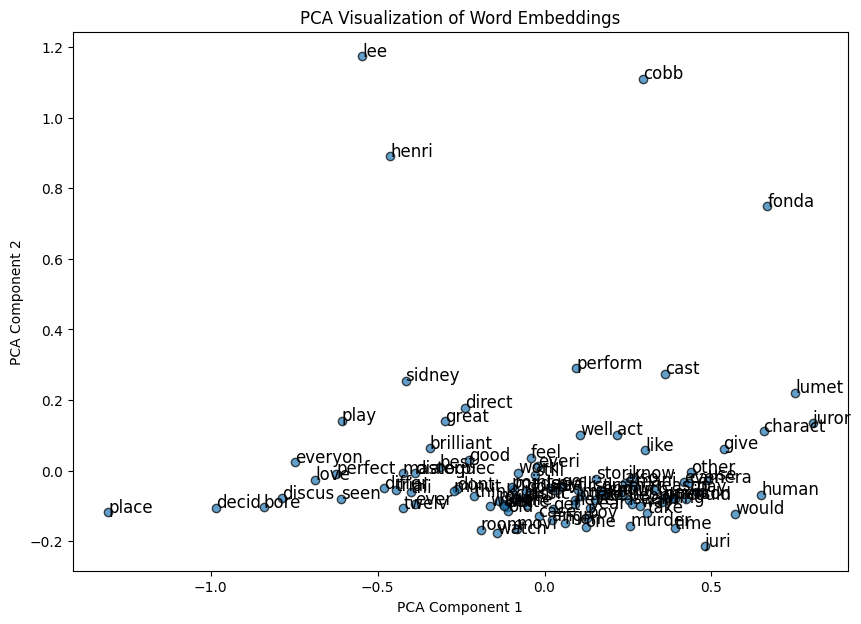

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Train Word2Vec model using map function
token_lists = df_reviews['tokens'].dropna().tolist()
w2v_model = Word2Vec(sentences=token_lists, vector_size=300, window=5, min_count=2, workers=4, sg=0)
word_vectors = w2v_model.wv

# Extract top N words and their embeddings
top_words = list(word_vectors.index_to_key)[:100]
word_embeddings = np.array(list(map(lambda w: word_vectors[w], top_words)))

# Apply PCA for dimensionality reduction
pca_model = PCA(n_components=2)
pca_vectors = pca_model.fit_transform(word_embeddings)

# Plot PCA visualization of word embeddings
plt.figure(figsize=(10, 7))
plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], edgecolors='k', alpha=0.7)

# Annotate words on the plot
list(map(lambda i: plt.text(pca_vectors[i, 0], pca_vectors[i, 1], top_words[i], fontsize=12), range(len(top_words))))

plt.title("PCA Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


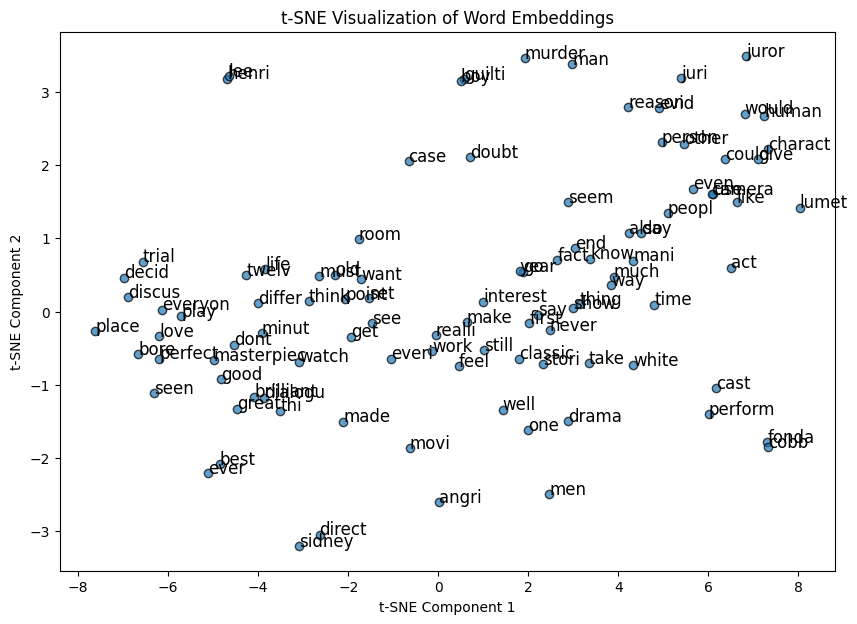

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Train Word2Vec model using map function
token_lists = df_reviews['tokens'].dropna().tolist()
w2v_model = Word2Vec(sentences=token_lists, vector_size=300, window=5, min_count=2, workers=4, sg=0)
word_vectors = w2v_model.wv

# Extract top N words and their embeddings
top_words = list(word_vectors.index_to_key)[:100]
word_embeddings = np.array(list(map(lambda w: word_vectors[w], top_words)))

# Apply t-SNE for dimensionality reduction
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_vectors = tsne_model.fit_transform(word_embeddings)

# Plot t-SNE visualization of word embeddings
plt.figure(figsize=(10, 7))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], edgecolors='k', alpha=0.7)

# Annotate words on the plot
list(map(lambda i: plt.text(tsne_vectors[i, 0], tsne_vectors[i, 1], top_words[i], fontsize=12), range(len(top_words))))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [ ]:
from scipy.spatial.distance import cosine

# Define word pairs for Batman Begins
word_pairs = [
    ('fear', 'justice'),
    ('shadow', 'darkness'),
    ('corruption', 'gotham'),
    ('vengeance', 'redemption'),
    ('training', 'strength')
]

def cosine_similarity(word1, word2):
    vec1 = word_vectors[word1]
    vec2 = word_vectors[word2]
    return 1 - cosine(vec1, vec2)

# word_pairs = [('nisei', 'japanese'), ('interview', 'history'), ('family', 'community')]

for w1, w2 in word_pairs:
    if w1 in word_vectors and w2 in word_vectors:
        similarity = cosine_similarity(w1, w2)
        print(f"Cosine Similarity between '{w1}' and '{w2}': {similarity:.4f}")
    else:
        print(f"One or both words '{w1}', '{w2}' not in vocabulary.")



One or both words 'fear', 'justice' not in vocabulary.
One or both words 'shadow', 'darkness' not in vocabulary.
One or both words 'corruption', 'gotham' not in vocabulary.
One or both words 'vengeance', 'redemption' not in vocabulary.
One or both words 'training', 'strength' not in vocabulary.


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = "revs.csv"
df_reviews = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_reviews.head()


,review,Cleaned_text
0,"This film is superb, in fact as Shakespeare on...",thi film superb fact shakespear said it bee kn...
1,This film is investing from start to finish. N...,thi film invest start finish none perform feel...
2,12 Angry Men is a terrific film that reflects ...,angri men terrif film reflect lot past problem...
3,Intense courtroom drama which has 12 very diff...,intens courtroom drama differ peopl male strug...
4,There are a few wonderful courtroom dramas out...,there wonder courtroom drama anatomi murder to...


In [ ]:
# Define sentiment keywords
pos_kw = {"great", "excellent", "perfect", "love", "best", "awesome", "fantastic", "good", "amazing"}
neg_kw = {"bad", "worst", "terrible", "disappointing", "not work", "poor", "awful", "broken"}

# Function to classify sentiment based on keywords
def classify_sent(text):
    words = set(text.lower().split()) if isinstance(text, str) else set()
    if words & pos_kw:
        return "Positive"
    elif words & neg_kw:
        return "Negative"
    return "Neutral"

# Apply sentiment classification using map function
df_reviews['short_sent'] = list(map(classify_sent, df_reviews['Cleaned_text']))

# Display results
df_reviews[['review', 'Cleaned_text', 'short_sent']].head()


,review,Cleaned_text,short_sent
0,"This film is superb, in fact as Shakespeare on...",thi film superb fact shakespear said it bee kn...,Neutral
1,This film is investing from start to finish. N...,thi film invest start finish none perform feel...,Neutral
2,12 Angry Men is a terrific film that reflects ...,angri men terrif film reflect lot past problem...,Positive
3,Intense courtroom drama which has 12 very diff...,intens courtroom drama differ peopl male strug...,Positive
4,There are a few wonderful courtroom dramas out...,there wonder courtroom drama anatomi murder to...,Neutral


In [ ]:
# Save the classified sentiment data to a CSV file
sentiment_csv_path = "batman_sentiment_analysis.csv"
df_reviews[['review', 'Cleaned_text', 'short_sent']].to_csv(sentiment_csv_path, index=False)

# Provide the file path for download
sentiment_csv_path


'batman_sentiment_analysis.csv'

The above technique performs sentiment analysis using keyword-based classification on reviews. It labels text as Positive if it contains words like "great" or "amazing," Negative if it includes words like "bad" or "broken," and Neutral otherwise. This rule-based approach is simple and efficient but may miss context or sarcasm. Other NLP tasks like Text Classification, NER, or Summarization could improve the analysis. AI assistance was used only for keyword selection to enhance accuracy.

In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/kraju1896/V-S-SAI-KANAKA-RAJU_Info5731_Fall2024/blob/main/batman_sentiment_analysis.csv


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

# Type your answer


In [ ]:
Enjoyed doing this assignmentg learnt many challanges and new techniques which helps me to get more intrest